In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./dataframe.csv")

In [75]:
df_grouped = df.groupby(["Tugger N"]).agg(Idle_1=pd.NamedAgg(column="Idle_time_1", aggfunc=lambda x: max(x)/60),
                                          Idle_2=pd.NamedAgg(column="Idle_time_2", aggfunc=lambda x: max(x)/60),
                                          Idle_3=pd.NamedAgg(column="Idle_time_3", aggfunc=lambda x: max(x)/60),
                                          Idle_4=pd.NamedAgg(column="Idle_time_4", aggfunc=lambda x: max(x)/60),
                                          Idle_5=pd.NamedAgg(column="Idle_time_5", aggfunc=lambda x: max(x)/60),
                                       Sat_1 = pd.NamedAgg(column="Saturation_1", aggfunc=lambda x: sum(x)/len(x)),
                                       Sat_2 = pd.NamedAgg(column="Saturation_2", aggfunc=lambda x: sum(x)/len(x)),
                            )

In [76]:
df_grouped["AVG idle"] = (df_grouped.Idle_1 + df_grouped.Idle_2 + df_grouped.Idle_3 + df_grouped.Idle_4 + df_grouped.Idle_5)/5
df_grouped["AVG charging saturation"] = (df_grouped.Sat_1 + df_grouped.Sat_2)/2

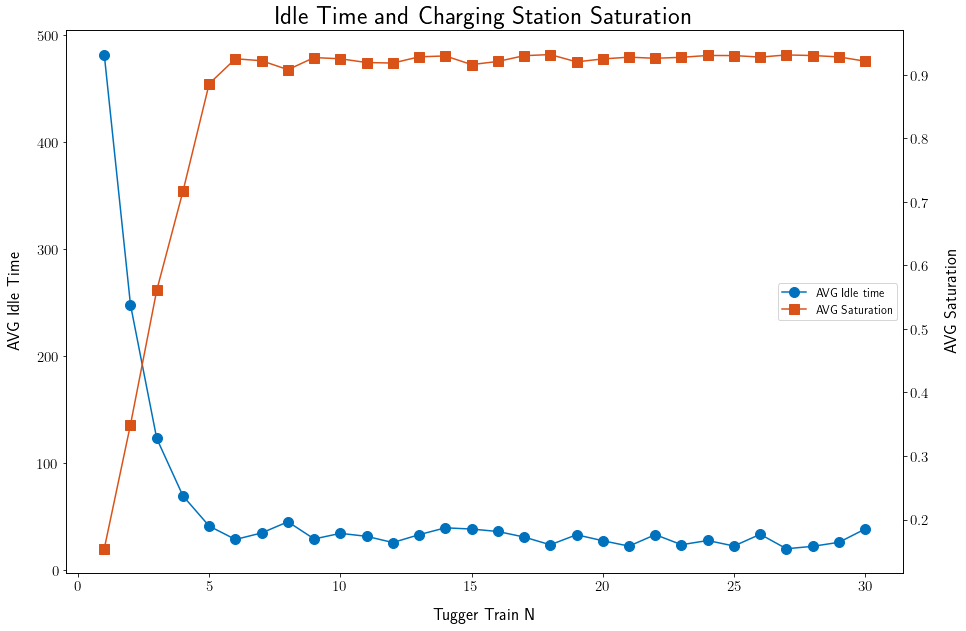

In [80]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel("AVG Idle Time",  fontdict={"fontsize":17}, labelpad = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Tugger Train N", fontdict={"fontsize":17}, labelpad = 15)

ax2 = ax.twinx()
ax2.set_ylabel("AVG Saturation", fontdict={"fontsize":17}, labelpad = 15)
ax2.tick_params(axis='y', which='major', labelsize=15)

lin1 = ax.plot(df_grouped["AVG idle"], label = "Idle time", color = "#0072BD", marker = "o", markersize=10)
lin2 = ax2.plot(df_grouped["AVG charging saturation"], color = "#D95319", marker = "s", markersize=10, label = "Saturation of CS")

t = ax.set_title("Idle Time and Charging Station Saturation", fontdict={"fontsize":25})

lns = lin1 + lin2
labs = ["AVG Idle time", "AVG Saturation"]
plt.legend(lns, labs, fontsize=12, loc=5)

fig.savefig("./images/idle_sat_tugger.png", dpi = 150)
plt.show()